Ornek aldigim site:
https://root.cern/doc/master/TMVA__Higgs__Classification_8py.html

Data: http://root.cern.ch/files/Higgs_data.root

In [2]:
!pip install uproot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.4/331.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.7/612.7 kB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.3 MB/s eta 0:00:00


In [111]:
import uproot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [4]:
ilkrootdosyasi = '/content/drive/MyDrive/bitirmeProjesi/FCCeh_Kut01_Kct01.root'
ikincirootdosyasi = '/content/drive/MyDrive/bitirmeProjesi/SM_FCC_eh.root'
ucuncurootdosyasi = '/content/Higgs_data.root'

In [5]:
file = uproot.open(ucuncurootdosyasi)

In [6]:
file.keys()

['sig_tree;1', 'bkg_tree;1']

In [7]:
sig_tree = file['sig_tree;1']
bkg_tree = file['bkg_tree;1']

In [8]:
sig_tree.keys()

['Type',
 'lepton_pT',
 'lepton_eta',
 'lepton_phi',
 'missing_energy_magnitude',
 'missing_energy_phi',
 'jet1_pt',
 'jet1_eta',
 'jet1_phi',
 'jet1_b-tag',
 'jet2_pt',
 'jet2_eta',
 'jet2_phi',
 'jet2_b-tag',
 'jet3_pt',
 'jet3_eta',
 'jet3_phi',
 'jet3_b-tag',
 'jet4_pt',
 'jet4_eta',
 'jet4_phi',
 'jet4_b-tag',
 'm_jj',
 'm_jjj',
 'm_lv',
 'm_jlv',
 'm_bb',
 'm_wbb',
 'm_wwbb']

In [9]:
len(sig_tree.keys())

29

In [10]:
sig_tree.arrays()

<Array [{Type: 1, lepton_pT: 0.869, ...}, ...] type='10000 * {Type: float32...'>

Type: Veri noktasının türünü belirten değişkenin türü.

lepton_pT: Leptonun transverse momentum (yatay momentum) değeri (float32).

lepton_eta: Leptonun pseudorapidity (hızlanma) değeri (float32).

lepton_phi: Leptonun açısal phi değeri (float32).

missing_energy_magnitude: Eksik enerjinin büyüklük değeri (float32).

missing_energy_phi: Eksik enerjinin açısal phi değeri (float32).

jet1_pt: İlk jetin transverse momentum değeri (float32).

jet1_eta: İlk jetin pseudorapidity değeri (float32).

jet1_phi: İlk jetin açısal phi değeri (float32).

"jet1_b-tag": İlk jetin b-etiketi değeri (float32).

jet2_pt: İkinci jetin transverse momentum değeri (float32).

jet2_eta: İkinci jetin pseudorapidity değeri (float32).

jet2_phi: İkinci jetin açısal phi değeri (float32).

"jet2_b-tag": İkinci jetin b-etiketi değeri (float32).

jet3_pt: Üçüncü jetin transverse momentum değeri (float32).

jet3_eta: Üçüncü jetin pseudorapidity değeri (float32).

jet3_phi: Üçüncü jetin açısal phi değeri (float32).

"jet3_b-tag": Üçüncü jetin b-etiketi değeri (float32).

jet4_pt: Dördüncü jetin transverse momentum değeri (float32).

jet4_eta: Dördüncü jetin pseudorapidity değeri (float32).

jet4_phi: Dördüncü jetin açısal phi değeri (float32).

"jet4_b-tag": Dördüncü jetin b-etiketi değeri (float32).

m_jj: İki jetin invariant mass (değişmez kütle) değeri (float32).

m_jjj: Üç jetin invariant mass (değişmez kütle) değeri (float32).

m_lv: Lepton ve eksik enerjinin invariant mass (değişmez kütle) değeri (float32).

m_jlv: Lepton, jet ve eksik enerjinin invariant mass (değişmez kütle) değeri (float32).

m_bb: İki b-etiketli jetin invariant mass (değişmez kütle) değeri (float32).

m_wbb: Lepton, iki b-etiketli jet ve eksik enerjinin invariant mass (değişmez kütle) değeri (float32).

m_wwbb: İki W bozonu, iki b-etiketli jet ve eksik enerjinin invariant mass (değişmez kütle) değeri (float32).


In [11]:
sig_tree_branches = sig_tree.arrays()
bkg_tree_branches = bkg_tree.arrays()

In [12]:
sig_tree_branches

<Array [{Type: 1, lepton_pT: 0.869, ...}, ...] type='10000 * {Type: float32...'>

In [33]:
# Özelliklerin listesini oluştur
feature_names = ['Type', 'lepton_pT', 'lepton_eta', 'lepton_phi', 'missing_energy_magnitude', 'missing_energy_phi',
                 'jet1_pt', 'jet1_eta', 'jet1_phi', 'jet1_b-tag', 'jet2_pt', 'jet2_eta', 'jet2_phi', 'jet2_b-tag',
                 'jet3_pt', 'jet3_eta', 'jet3_phi', 'jet3_b-tag', 'jet4_pt', 'jet4_eta', 'jet4_phi', 'jet4_b-tag',
                 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

# Özellikleri numpy dizilerine dönüştür
sig_data = np.array([sig_tree_branches[feature_name] for feature_name in feature_names]).T
bkg_df = np.array([bkg_tree_branches[feature_name] for feature_name in feature_names]).T

# Numpy dizilerini kullanarak DataFrame oluştur
sig_df = pd.DataFrame(sig_data, columns=feature_names)
bkg_df = pd.DataFrame(bkg_df, columns=feature_names)

In [34]:
sig_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      10000 non-null  float32
 1   lepton_pT                 10000 non-null  float32
 2   lepton_eta                10000 non-null  float32
 3   lepton_phi                10000 non-null  float32
 4   missing_energy_magnitude  10000 non-null  float32
 5   missing_energy_phi        10000 non-null  float32
 6   jet1_pt                   10000 non-null  float32
 7   jet1_eta                  10000 non-null  float32
 8   jet1_phi                  10000 non-null  float32
 9   jet1_b-tag                10000 non-null  float32
 10  jet2_pt                   10000 non-null  float32
 11  jet2_eta                  10000 non-null  float32
 12  jet2_phi                  10000 non-null  float32
 13  jet2_b-tag                10000 non-null  float32
 14  jet3_pt

In [35]:
# Signal ve background verilerini birleştirin
merged_df = pd.concat([sig_df, bkg_df], ignore_index=True)

# Veri setini karıştırın (shuffle)
merged_df = merged_df.sample(frac=1).reset_index(drop=True)

In [36]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type                      20000 non-null  float32
 1   lepton_pT                 20000 non-null  float32
 2   lepton_eta                20000 non-null  float32
 3   lepton_phi                20000 non-null  float32
 4   missing_energy_magnitude  20000 non-null  float32
 5   missing_energy_phi        20000 non-null  float32
 6   jet1_pt                   20000 non-null  float32
 7   jet1_eta                  20000 non-null  float32
 8   jet1_phi                  20000 non-null  float32
 9   jet1_b-tag                20000 non-null  float32
 10  jet2_pt                   20000 non-null  float32
 11  jet2_eta                  20000 non-null  float32
 12  jet2_phi                  20000 non-null  float32
 13  jet2_b-tag                20000 non-null  float32
 14  jet3_p

In [37]:
merged_df['Type']

0        1.0
1        1.0
2        1.0
3        1.0
4        0.0
        ... 
19995    0.0
19996    1.0
19997    1.0
19998    0.0
19999    0.0
Name: Type, Length: 20000, dtype: float32

In [47]:
merged_df['Type'].unique()

array([1., 0.], dtype=float32)

In [38]:
X = merged_df.drop(['Type'], axis = "columns")
y = merged_df['Type']

In [39]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 20000 entries, 0 to 19999
Series name: Type
Non-Null Count  Dtype  
--------------  -----  
20000 non-null  float32
dtypes: float32(1)
memory usage: 78.2 KB


In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   lepton_pT                 20000 non-null  float32
 1   lepton_eta                20000 non-null  float32
 2   lepton_phi                20000 non-null  float32
 3   missing_energy_magnitude  20000 non-null  float32
 4   missing_energy_phi        20000 non-null  float32
 5   jet1_pt                   20000 non-null  float32
 6   jet1_eta                  20000 non-null  float32
 7   jet1_phi                  20000 non-null  float32
 8   jet1_b-tag                20000 non-null  float32
 9   jet2_pt                   20000 non-null  float32
 10  jet2_eta                  20000 non-null  float32
 11  jet2_phi                  20000 non-null  float32
 12  jet2_b-tag                20000 non-null  float32
 13  jet3_pt                   20000 non-null  float32
 14  jet3_e

# Train Test Split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=26)

# LogisticRegression

In [78]:
# Train
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

# Predict the target values for the test data
y_prediction = logistic_regression.predict(X_test)

In [79]:
log_acc=accuracy_score(y_test, y_prediction)
log_f1=f1_score(y_test, y_prediction)
log_roc_auc=roc_auc_score(y_test, y_prediction)
print(f'''Logistic Regression Model Evaluation Metrics:
- Accuracy: {(log_acc * 100):.2f}%
- F1 Score: {(log_f1 * 100):.2f}%
- ROC AUC Score: {(log_roc_auc * 100):.2f}%
''')

Logistic Regression Model Evaluation Metrics:
- Accuracy: 64.60%
- F1 Score: 65.64%
- ROC AUC Score: 64.62%



# RandomForestClassifier

In [80]:
# Train
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict the target values for the test data
y_prediction_rf = random_forest.predict(X_test)

In [81]:
rfc_acc=accuracy_score(y_test, y_prediction_rf)
rfc_f1=f1_score(y_test, y_prediction_rf)
rfc_roc_auc=roc_auc_score(y_test, y_prediction_rf)
print(f'''Random Forest Classifier Model Evaluation Metrics:
- Accuracy: {(rfc_acc * 100):.2f}%
- F1 Score: {(rfc_f1 * 100):.2f}%
- ROC AUC Score: {(rfc_roc_auc * 100):.2f}%
''')

Random Forest Classifier Model Evaluation Metrics:
- Accuracy: 70.33%
- F1 Score: 69.55%
- ROC AUC Score: 70.32%



# KNeighborsClassifier

Max Train Score : %100.0 - K : [1]
Max Test Score : %57.41666666666667 - Best K : [15]


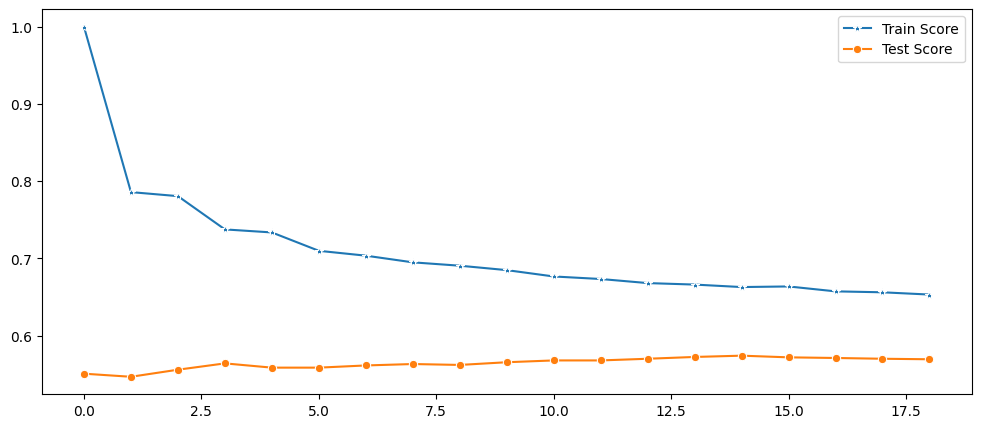

In [82]:
test_score = []
train_score = []

for i in range(1, 20):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

# max scores
max_train_score = max(train_score)
train_score_ind = [i for i, v in enumerate(train_score) if v == max_train_score]
 
max_test_score = max(test_score)
test_score_ind = [i for i, v in enumerate(test_score) if v == max_test_score]


print(f'Max Train Score : %{max_train_score * 100} - K : {list(map(lambda x: x+1, train_score_ind))}')
print(f'Max Test Score : %{max_test_score * 100} - Best K : {list(map(lambda x: x+1, test_score_ind))}')

# graph

plt.figure(figsize=(12, 5))
p = sns.lineplot(train_score, marker="*", label="Train Score")
p = sns.lineplot(test_score, marker="o", label="Test Score")
plt.show()

In [83]:
# Fit
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)

# prediction
y_prediction_knn = knn.predict(X_test)

In [84]:
knn_acc=accuracy_score(y_test, y_prediction_knn)
knn_f1=f1_score(y_test, y_prediction_knn)
knn_roc_auc=roc_auc_score(y_test, y_prediction_knn)
print(f'''K Neighbors Classifier Model Evaluation Metrics:
- Accuracy: {(knn_acc * 100):.2f}%
- F1 Score: {(knn_f1 * 100):.2f}%
- ROC AUC Score: {(knn_roc_auc * 100):.2f}%
''')

K Neighbors Classifier Model Evaluation Metrics:
- Accuracy: 57.42%
- F1 Score: 60.12%
- ROC AUC Score: 57.46%



# GaussianNB

In [73]:
# Train the Random Forest classifier
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict the target values for the test data
y_prediction_gnb = gnb.predict(X_test)

In [74]:
gnb_acc=accuracy_score(y_test, y_prediction_gnb)
gnb_f1=f1_score(y_test, y_prediction_gnb)
gnb_roc_auc=roc_auc_score(y_test, y_prediction_gnb)
print(f'''GaussianNB Model Evaluation Metrics:
- Accuracy: {(gnb_acc * 100):.2f}%
- F1 Score: {(gnb_f1 * 100):.2f}%
- ROC AUC Score: {(gnb_roc_auc * 100):.2f}%
''')

GaussianNB Model Evaluation Metrics:
- Accuracy: 58.70%
- F1 Score: 66.48%
- ROC AUC Score: 58.63%



#Keras DL

In [114]:
import tensorflow as tf
from tensorflow.keras import layers

In [115]:
model = keras.Sequential([
    keras.Input(shape=(28,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [107]:
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 64)                1856      
                                                                 
 dense_21 (Dense)            (None, 64)                4160      
                                                                 
 dense_22 (Dense)            (None, 64)                4160      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14,401
Trainable params: 14,401
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
     

In [109]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
438/438 [==============================] - 2s 3ms/step - loss: 0.6777 - accuracy: 0.5589 - val_loss: 0.6761 - val_accuracy: 0.5593
Epoch 2/10
438/438 [==============================] - 1s 3ms/step - loss: 0.6462 - accuracy: 0.6196 - val_loss: 0.6491 - val_accuracy: 0.6140
Epoch 3/10
438/438 [==============================] - 2s 4ms/step - loss: 0.6273 - accuracy: 0.6449 - val_loss: 0.6453 - val_accuracy: 0.6268
Epoch 4/10
438/438 [==============================] - 2s 4ms/step - loss: 0.6172 - accuracy: 0.6595 - val_loss: 0.6361 - val_accuracy: 0.6370
Epoch 5/10
438/438 [==============================] - 2s 4ms/step - loss: 0.6067 - accuracy: 0.6662 - val_loss: 0.6402 - val_accuracy: 0.6360
Epoch 6/10
438/438 [==============================] - 1s 3ms/step - loss: 0.6011 - accuracy: 0.6729 - val_loss: 0.6359 - val_accuracy: 0.6437
Epoch 7/10
438/438 [==============================] - 1s 3ms/step - loss: 0.5901 - accuracy: 0.6822 - val_loss: 0.6330 - val_accuracy: 0.6463
Epoch 

In [110]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test set loss: ", loss)
print("Test set accuracy: ", accuracy)

188/188 [==============================] - 0s 2ms/step - loss: 0.6715 - accuracy: 0.6185
Test set loss:  0.6714657545089722
Test set accuracy:  0.6184999942779541


# Roc Eğrileri Grafiği

188/188 [==============================] - 1s 3ms/step


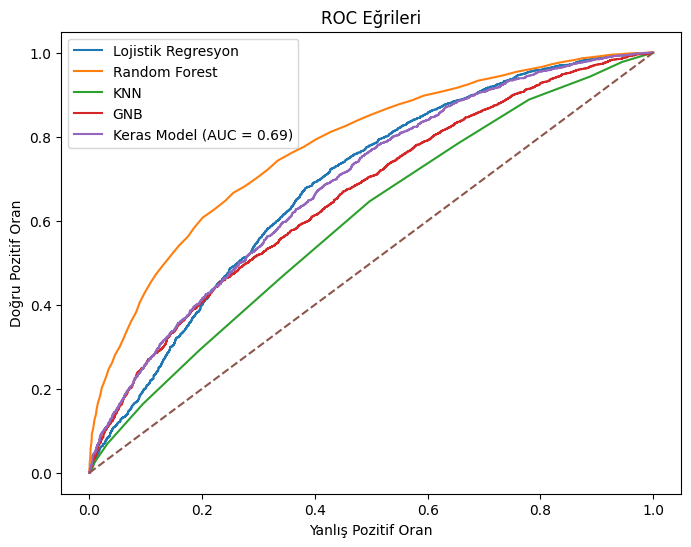

In [113]:
# lojistik regresyon ROC eğrisi
y_probs_log = logistic_regression.predict_proba(X_test)[:,1]
FPR_log, TPR_log, _ = roc_curve(y_test, y_probs_log)

# rastgele orman ROC eğrisi
y_probs_rf = random_forest.predict_proba(X_test)[:,1]
FPR_rf, TPR_rf, _ = roc_curve(y_test, y_probs_rf)

# KNN ROC eğrisi
y_probs_knn = knn.predict_proba(X_test)[:,1]
FPR_knn, TPR_knn, _ = roc_curve(y_test, y_probs_knn)

# KNN ROC eğrisi
y_probs_gnb = gnb.predict_proba(X_test)[:,1]
FPR_gnb, TPR_gnb, _ = roc_curve(y_test, y_probs_gnb)

# Keras model ROC eğrisi
y_probs_model = model.predict(X_test)
fpr_model, tpr_model, _ = roc_curve(y_test, y_probs_model)
roc_auc_model = auc(fpr_model, tpr_model)

# tek bir grafikte üç ROC eğrisi çizimi
fig, ax = plt.subplots(figsize = (8,6))
plt.plot(FPR_log, TPR_log, label='Lojistik Regresyon')
plt.plot(FPR_rf, TPR_rf, label='Random Forest')
plt.plot(FPR_knn, TPR_knn, label='KNN')
plt.plot(FPR_gnb, TPR_gnb, label='GNB')
plt.plot(fpr_model, tpr_model, label='Keras Model (AUC = %0.2f)' % roc_auc_model)
plt.plot([0,1], [0,1], '--')
plt.xlabel('Yanlış Pozitif Oran')
plt.ylabel('Doğru Pozitif Oran')
plt.title('ROC Eğrileri')
plt.legend()
plt.show()